In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

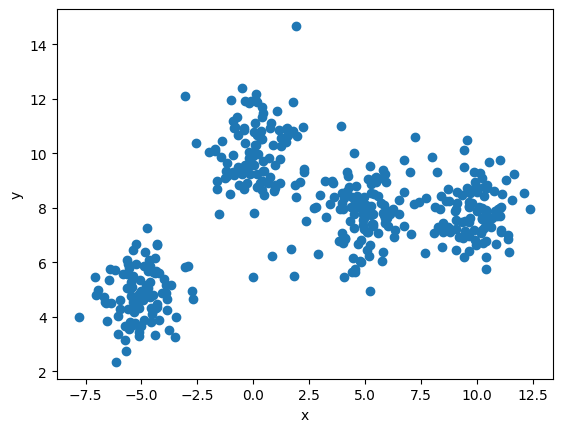

In [40]:
np.random.seed(0)

n = 100

x1 = np.random.normal(0, 1, n)
y1 = np.random.normal(10, 1, n)

x2 = np.random.normal(-5, 1, n)
y2 = np.random.normal(5, 1, n)

x3 = np.random.normal(5, 1, n)
y3 = np.random.normal(8, 1, n)

x4 = np.random.normal(10, 1, n)
y4 = np.random.normal(8, 1, n)

x5 = np.random.normal(2, 3, n//5)
y5 = np.random.normal(8, 3, n//5)

df = pd.DataFrame({
    'x': np.concatenate([x1, x2, x3, x4, x5]),
    'y': np.concatenate([y1, y2, y3, y4, y5])
})

plt.scatter(df['x'], df['y'])

plt.xlabel('x')
plt.ylabel('y')

c:\Users\nicol\Desktop\Cours\M1\S8\Machine Learning 2\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


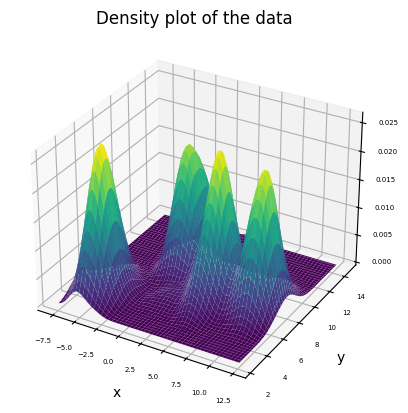

In [38]:
# Calculate the density of the data
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(df)
density = np.exp(kde.score_samples(df))

# 3d plot the density
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a mesh grid of density values
x = np.linspace(df['x'].min(), df['x'].max(), 100)
y = np.linspace(df['y'].min(), df['y'].max(), 100)
X, Y = np.meshgrid(x, y)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.exp(kde.score_samples(positions.T)).reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap='viridis')
plt.title('Density plot of the data')
plt.xlabel('x')
plt.ylabel('y')

# 3rd dimension is the density, add labels
ax.set_zlabel('Density')

# Change the font size of the scale
ax.tick_params(axis='both', which='major', labelsize=5)